# Real Estate Project

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [28]:
data.shape

(404, 14)

In [5]:
data['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000292353A5D68>,
      dtype=object)

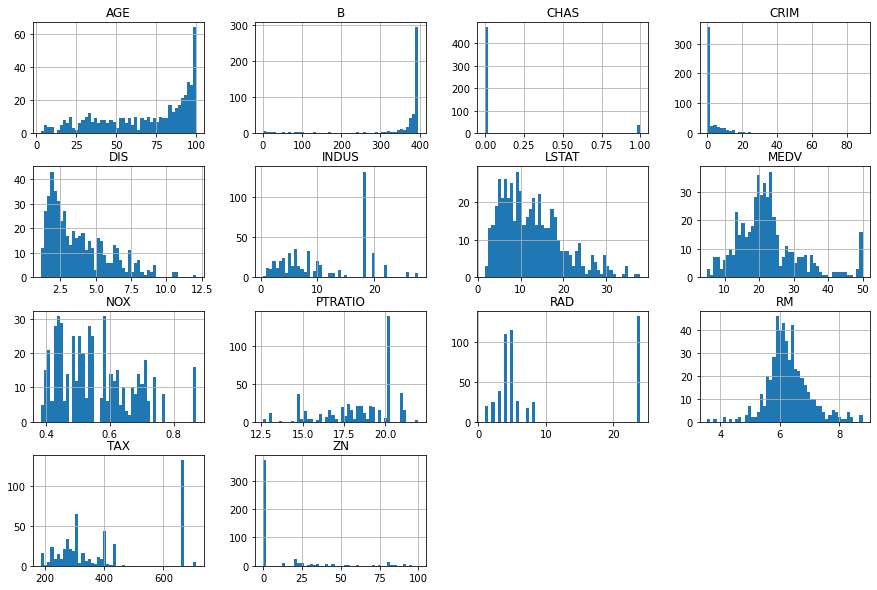

In [8]:
data.hist(bins = 50,figsize = (15,10))

In [9]:
import numpy as np
# def split_train_test(data,split_ratio):
#     np.random.seed(42)
#     shuffled = np.random.permutation(len(data))
#     test_set_size = int(len(data) * split_ratio)
#     test_indices = shuffled[:test_set_size]
#     train_indices = shuffled[test_set_size:]
#     return data.iloc[train_indices],data.iloc[test_indices]

In [10]:
# train_test , test_set = split_train_test(data,0.2)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train_set , test_set = train_test_split(data,test_size = 0.2,random_state=42)

In [13]:
train_set.shape

(404, 14)

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1,test_size = 0.2,random_state = 42)
for train_index,test_index in split.split(data,data['CHAS']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]
    

In [34]:
data = strat_train_set.copy()


In [35]:
corr_matrix = data.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002923A21CD30>,
      dtype=object)

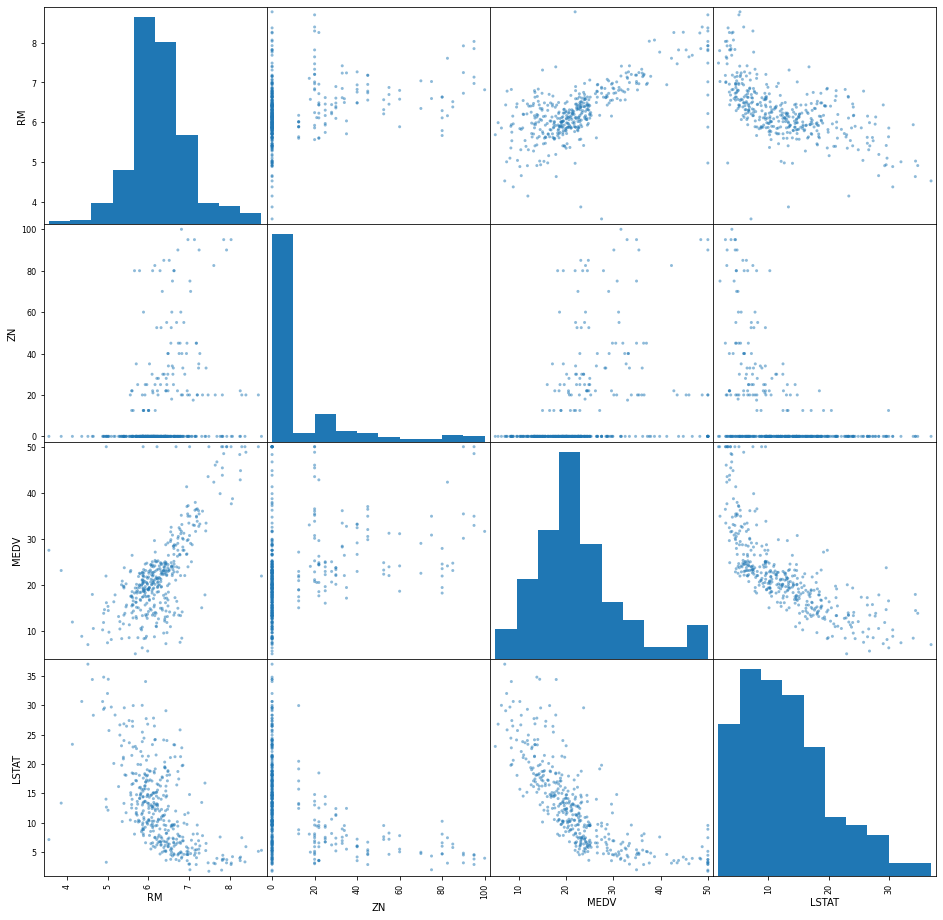

In [17]:
from pandas.plotting import scatter_matrix
attr = ["RM","ZN","MEDV","LSTAT"]
scatter_matrix(data[attr],figsize = (16,16))

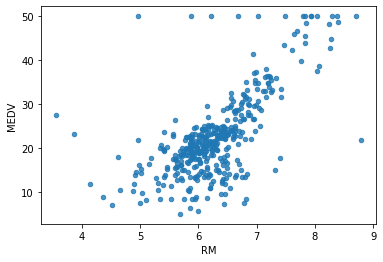

In [18]:
data.plot(kind = 'scatter',x="RM",y = "MEDV",alpha = 0.8)

In [36]:
data = strat_train_set.drop("MEDV",axis=1)
data_labels = strat_train_set["MEDV"].copy()

In [37]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(data)

SimpleImputer(strategy='median')

In [20]:
data.shape

(404, 14)

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipe = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler())
])

In [40]:
data_tr = pipe.fit_transform(data)

In [42]:
data_tr.shape

(404, 13)

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(data_tr,data_labels)

RandomForestRegressor()

In [86]:
sample = data.iloc[:5]
sample_labels = data_labels.iloc[:5]

In [87]:
prepare_data = pipe.transform(sample)

In [88]:
model.predict(prepare_data)

array([22.268, 25.743, 16.448, 23.477, 23.792])

In [89]:
list(sample_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

In [90]:
from sklearn.metrics import mean_squared_error
predictions = model.predict(data_tr)
mse = mean_squared_error(data_labels,predictions)
rmse = np.sqrt(mse)

In [91]:
rmse

1.167289296609969

In [92]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,data_tr,data_labels,scoring = "neg_mean_squared_error",cv=10)
rmse_score = np.sqrt(-scores)

 rmse_score

In [93]:
rmse_score

array([2.85814214, 2.7715758 , 4.4895685 , 2.63799945, 3.48310655,
       2.62472523, 4.49344904, 3.40089921, 3.0814285 , 3.36115469])

In [94]:
def print_scores(scores):
    print("Scores: ",scores)
    print("Scores mean: ",scores.mean())
    print("Standard Deviation: ",scores.std())

In [95]:
print_scores(rmse_score)

Scores:  [2.85814214 2.7715758  4.4895685  2.63799945 3.48310655 2.62472523
 4.49344904 3.40089921 3.0814285  3.36115469]
Scores mean:  3.3202049109678904
Standard Deviation:  0.6556862634019167


In [96]:
from joblib import dump,load
dump(model,"Real_Estate.joblib")

['Real_Estate.joblib']

# testing

In [97]:
x_test = strat_test_set.drop("MEDV",axis=1)
y_test = strat_test_set["MEDV"].copy()

In [98]:
x_test_prepare = pipe.transform(x_test)

In [99]:
f_predictions = model.predict(x_test_prepare)
f_mse = mean_squared_error(y_test,f_predictions)
f_rmse = np.sqrt(f_mse)

In [100]:
f_rmse

2.9573473126183494